In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle
from collections import Counter
import pickle


In [2]:
dirr = r'C:\Users\Vinayak Sidharth\Documents\Garbage classification'

In [3]:
files = ['cardboard','glass','metal','paper','plastic','trash']

In [4]:
def convert_folder(path , folder):
    final = []
    ff = os.path.join(path, folder)
    loc = os.listdir(os.path.join(path, folder) )
    n_loc = []
    for i in range(len(loc)):
        n_loc.append(folder+str(i+1)+'.jpg')
        
    if set(n_loc) != set(loc):
        return 0
    
    
    for j in n_loc:
        img = cv2.imread(os.path.join(ff, j),cv2.IMREAD_UNCHANGED )
        final.append(cv2.resize(img, (300,300)))
    return np.array(final)

In [29]:
def create_labels(array):
    y_meg = []
    for i,val in enumerate(array):
        y_meg.append(np.full((len(val),),i ))
    return y_meg

In [61]:
def test_sets(x,y,split):
    su= x
    np.random.shuffle(su)
    sp = int(len(su)*split)
    su_ts= su[:sp]
    su_tr = su[sp:]
    y_ts = y[:sp]
    y_tr = y[sp:]
    return su_tr, y_tr, su_ts, y_ts

In [121]:
def combine_shuffle(arr_x, arr_y):
    X = np.concatenate(tuple([arr_x[i] for i in range(len(arr_x))]))
    y = np.concatenate(tuple([arr_y[i] for i in range(len(arr_y))]))
    X,y = shuffle(X,y)
    return X,y

In [30]:
y_unique = np.array([[1,0,0,0,0], [0,1,0,0,0], [0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1] ])
y_class = [0,1,2,3,4]

In [5]:
cardboard = convert_folder(dirr , files[0])
glass = convert_folder(dirr, files[1])
metal =  convert_folder(dirr, files[2])
paper = convert_folder(dirr, files[3])
plastic = convert_folder(dirr, files[4])

In [32]:
cardboard_y =  create_labels([cardboard,glass,metal,paper,plastic])[0]
glass_y = create_labels([cardboard,glass,metal,paper,plastic])[1]
metal_y =  create_labels([cardboard,glass,metal,paper,plastic])[2]
paper_y = create_labels([cardboard,glass,metal,paper,plastic])[3]
plastic_y = create_labels([cardboard,glass,metal,paper,plastic])[4]

In [69]:
total_size = len(cardboard) + len(glass) + len(metal) + len(paper) + len(plastic) 

In [71]:
split = 0.1
cx_tr , cy_tr, cx_ts, cy_ts = test_sets(cardboard,cardboard_y,split)
gx_tr , gy_tr, gx_ts, gy_ts = test_sets(glass,glass_y,split)
mx_tr , my_tr, mx_ts, my_ts = test_sets(metal,metal_y,split)
px_tr , py_tr, px_ts, py_ts = test_sets(paper,paper_y,split)
lx_tr , ly_tr, lx_ts, ly_ts = test_sets(plastic,plastic_y,split)

In [124]:
tr_x = [cx_tr,gx_tr, mx_tr,px_tr,lx_tr]
tr_y = [cy_tr,gy_tr, my_tr,py_tr,ly_tr]
ts_x = [cx_ts,gx_ts, mx_ts,px_ts,lx_ts]
ts_y = [cy_ts,gy_ts, my_ts,py_ts,ly_ts]

In [125]:
X_train , y_train  = combine_shuffle(tr_x,tr_y)
X_test , y_test = combine_shuffle(ts_x, ts_y)

In [130]:
print("Shape of Xtrain: {}, ytrain : {}, Xtest : {}, ytest : {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Shape of Xtrain: (2152, 300, 300, 3), ytrain : (2152,), Xtest : (238, 300, 300, 3), ytest : (238,)


paper


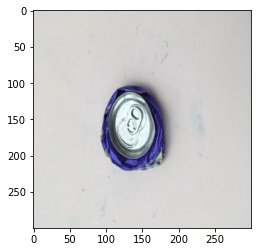

In [186]:
val = 621
dis = {0:'cardboard',1:'glass',2:'metal',3:'paper',4:'plastic'}
plt.imshow(X_train[69])
print(dis[y_train[val] ])

In [175]:
Counter(y_train)

Counter({0: 363, 1: 451, 2: 369, 3: 535, 4: 434})

In [162]:
Counter(y_test)

Counter({0: 40, 3: 59, 2: 41, 4: 48, 1: 50})

In [176]:
maxx = np.max(X_train)

In [178]:
x_tsss = X_test/maxx

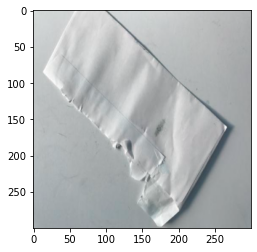

In [221]:
plt.imshow(sa[69])

In [207]:
one = open('xGBtrain.pickle', 'w+b')
pickle.dump(X_train,one)

In [198]:
one_y = open('yGBtrain.pickle', 'w+b')
pickle.dump(y_train,one_y)

In [218]:
two = open('xGBtest.pickle', 'w+b')
pickle.dump(X_test, two)

In [222]:
two_y = open('yGBtest.pickle', 'w+b')
pickle.dump(y_test,two_y)

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
ss = open(r'C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts/xGBtrain.pickle', 'r+b')
xtrain = pickle.load(ss)

In [4]:
s1 = open('yGBtrain.pickle', 'r+b')
ytrain = pickle.load(s1)

In [5]:
st = open('xGBtest.pickle', 'r+b')
xtest = pickle.load(st)

In [6]:
s2 =  open('yGBtest.pickle', 'r+b')
ytest = pickle.load(s2)

In [7]:
xtrain.shape

(2152, 300, 300, 3)

In [8]:
xtest.shape

(238, 300, 300, 3)

In [9]:
ytrain.shape

(2152,)

In [10]:
ytest.shape

(238,)

In [11]:
xtrain = np.array(xtrain)

In [12]:
X = xtrain/(255.0)

In [13]:
X.shape

(2152, 300, 300, 3)

In [14]:
y = np.array(tf.keras.utils.to_categorical(ytrain) )

In [15]:
ytrain

array([0, 1, 0, ..., 4, 4, 2])

In [16]:
y

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [17]:
len(X)

2152

In [18]:
h  =tf.random.normal((30,300,300,3))

In [30]:
path = r'C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts\check2.hdf5'
checkpoint1 = tf.keras.callbacks.ModelCheckpoint(path , monitor='val_accuracy', save_best_only=True, mode='max', verbose = 1)
callback_list = [checkpoint1]


In [26]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32, (4,4), activation = 'relu', ))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (4,4), activation = 'relu' ))
model.add(MaxPooling2D(3))
model.add(Dropout(0.1))

model.add(Conv2D(32, (4,4), activation = 'relu' ))
model.add(MaxPooling2D(4))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'] )

In [27]:
model.fit(X, y, validation_split = 0.28, epochs = 10 )

Train on 1549 samples, validate on 603 samples
Epoch 1/10
1549/1549 [==============================] - 131s 84ms/sample - loss: 1.5862 - accuracy: 0.2576 - val_loss: 1.5461 - val_accuracy: 0.2968
Epoch 2/10
1549/1549 [==============================] - 143s 92ms/sample - loss: 1.3864 - accuracy: 0.3964 - val_loss: 1.4520 - val_accuracy: 0.4229
Epoch 3/10
1549/1549 [==============================] - 143s 92ms/sample - loss: 1.2924 - accuracy: 0.4590 - val_loss: 1.2975 - val_accuracy: 0.4760
Epoch 4/10
1549/1549 [==============================] - 140s 91ms/sample - loss: 1.1571 - accuracy: 0.5274 - val_loss: 1.1736 - val_accuracy: 0.4925
Epoch 5/10
1549/1549 [==============================] - 144s 93ms/sample - loss: 1.0898 - accuracy: 0.5584 - val_loss: 1.2363 - val_accuracy: 0.4925
Epoch 6/10
1549/1549 [==============================] - 142s 91ms/sample - loss: 0.9845 - accuracy: 0.6165 - val_loss: 1.1461 - val_accuracy: 0.5473
Epoch 7/10
1549/1549 [==============================] - 751

In [29]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32, (4,4), activation = 'relu', ))
model.add(MaxPooling2D(2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (4,4), activation = 'relu' ))
model.add(MaxPooling2D(3))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'] )

In [31]:
model.fit(X, y, validation_split = 0.1, epochs = 10, callbacks = callback_list )

Train on 1936 samples, validate on 216 samples
Epoch 1/10
1920/1936 [============================>.] - ETA: 1s - loss: 2.1763 - accuracy: 0.2380
Epoch 00001: val_accuracy improved from -inf to 0.24074, saving model to C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts\check2.hdf5
1936/1936 [==============================] - 189s 98ms/sample - loss: 2.1713 - accuracy: 0.2392 - val_loss: 1.6052 - val_accuracy: 0.2407
Epoch 2/10
1920/1936 [============================>.] - ETA: 1s - loss: 1.5935 - accuracy: 0.2547
Epoch 00002: val_accuracy improved from 0.24074 to 0.25926, saving model to C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts\check2.hdf5
1936/1936 [==============================] - 184s 95ms/sample - loss: 1.5929 - accuracy: 0.2557 - val_loss: 1.5901 - val_accuracy: 0.2593
Epoch 3/10
1920/1936 [============================>.] - ETA: 1s - loss: 1.5573 - accuracy: 0.2542
Epoch 00003: val_accuracy improved from 0.25926 to 0.34722, savi

In [32]:
model.fit(X, y, validation_split = 0.1, epochs = 20, callbacks = callback_list )

Train on 1936 samples, validate on 216 samples
Epoch 1/20
1920/1936 [============================>.] - ETA: 1s - loss: 0.9278 - accuracy: 0.6214
Epoch 00001: val_accuracy improved from 0.56019 to 0.59722, saving model to C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts\check2.hdf5
1936/1936 [==============================] - 183s 95ms/sample - loss: 0.9277 - accuracy: 0.6198 - val_loss: 1.1052 - val_accuracy: 0.5972
Epoch 2/20
1920/1936 [============================>.] - ETA: 1s - loss: 0.8612 - accuracy: 0.6510
Epoch 00002: val_accuracy did not improve from 0.59722
1936/1936 [==============================] - 186s 96ms/sample - loss: 0.8607 - accuracy: 0.6513 - val_loss: 1.1076 - val_accuracy: 0.5787
Epoch 3/20
1920/1936 [============================>.] - ETA: 1s - loss: 0.8253 - accuracy: 0.6635
Epoch 00003: val_accuracy did not improve from 0.59722
1936/1936 [==============================] - 187s 97ms/sample - loss: 0.8246 - accuracy: 0.6632 - val_loss: 1.11

In [35]:
model.load_weights(path)

In [36]:
model.save(r'C:\Users\Vinayak Sidharth\Documents\garbagsse2.model')

INFO:tensorflow:Assets written to: C:\Users\Vinayak Sidharth\Documents\garbagsse2.model\assets


In [28]:
Flatten()(q8)

<tf.Tensor: shape=(30, 128), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , ..., 0.79208636, 0.        ,
        0.40682346],
       [0.        , 0.        , 0.        , ..., 0.88054585, 0.        ,
        0.47401103],
       [0.        , 0.        , 0.        , ..., 0.8481859 , 0.        ,
        0.43314514],
       ...,
       [0.        , 0.        , 0.        , ..., 0.81198996, 0.        ,
        0.5222058 ],
       [0.        , 0.        , 0.        , ..., 0.88651145, 0.        ,
        0.44548538],
       [0.        , 0.        , 0.        , ..., 0.9386479 , 0.        ,
        0.526309  ]], dtype=float32)>